In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Student_performance_data.csv")
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


StudentID            False
Age                  False
Gender               False
Ethnicity            False
ParentalEducation    False
StudyTimeWeekly      False
Absences             False
Tutoring             False
ParentalSupport      False
Extracurricular      False
Sports               False
Music                False
Volunteering         False
GPA                  False
GradeClass           False
dtype: bool

In [9]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


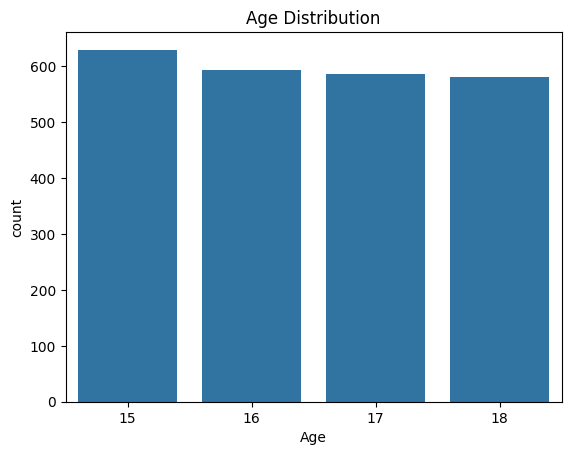

In [10]:
sns.countplot(data=df, x=df["Age"])
plt.title('Age Distribution')
plt.show()

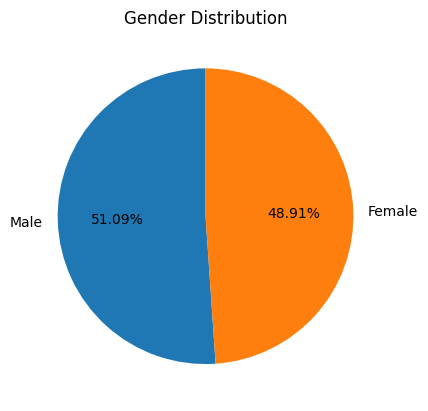

In [11]:
plt.figure()
male,female = df['Gender'].value_counts().items()
plt.pie(np.array([male[1],female[1]]),
labels=['Male','Female'],autopct='%1.2f%%',startangle=90);
plt.title("Gender Distribution")
plt.show()

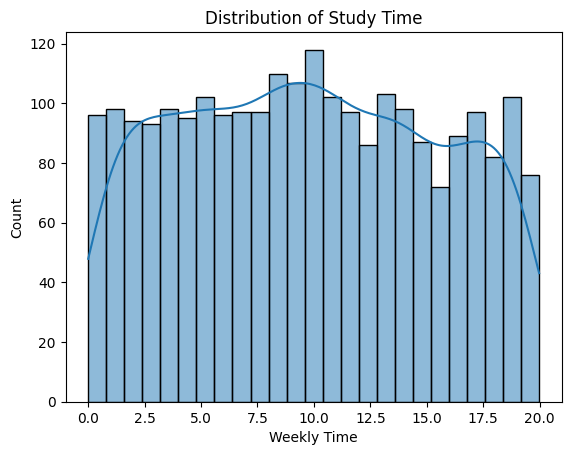

In [12]:
sns.histplot(data=df, x=df["StudyTimeWeekly"], kde=True, bins=25)
plt.title(f'Distribution of Study Time')
plt.xlabel("Weekly Time")
plt.show()

In [13]:
y = df["GPA"].values
X = df.drop(["GPA",'GradeClass'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

models = []
models.append(('LR', LinearRegression()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))

results = []
names = []


# Performing cross-validation
for name, model in models:
    kfold = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(scores)
    names.append(name)
    print(f"Model: {name}, Mean: {scores.mean():.2f}, Std: {scores.std():.2f}")
    

Model: LR, Mean: 0.95, Std: 0.01
Model: KNR, Mean: 0.69, Std: 0.02
Model: DTR, Mean: 0.84, Std: 0.02


In [14]:
imputer = SimpleImputer(strategy='most_frequent')
knn = KNeighborsRegressor()

# Create Pipeline
steps = [('imputation', imputer), ('knn', knn)]
pipeline = Pipeline(steps)

# Set Parameters for GridSearchCV
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error')

# Fit the Model using GridSearchCV
cv.fit(X_train, y_train)
print(f"Best Parameters: {cv.best_params_}")
print(f"Best score is {cv.best_score_}")
y_pred = cv.best_estimator_.predict(X_test)

# Accuracy results
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Best Parameters: {'knn__n_neighbors': 3}
Best score is -0.2576564112881929
Mean Squared Error:  0.23086662400917393
Mean Absolute Error:  0.3821620375584799
R2 Score:  0.7258224771179873
